In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.6.0


[]

In [2]:
# Download the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

In [3]:
print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Type of the training images: {type(train_images)}")

Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)
Type of the training images: <class 'numpy.ndarray'>


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

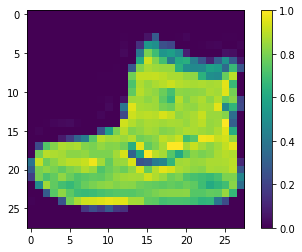

In [5]:
# Print the iamges
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

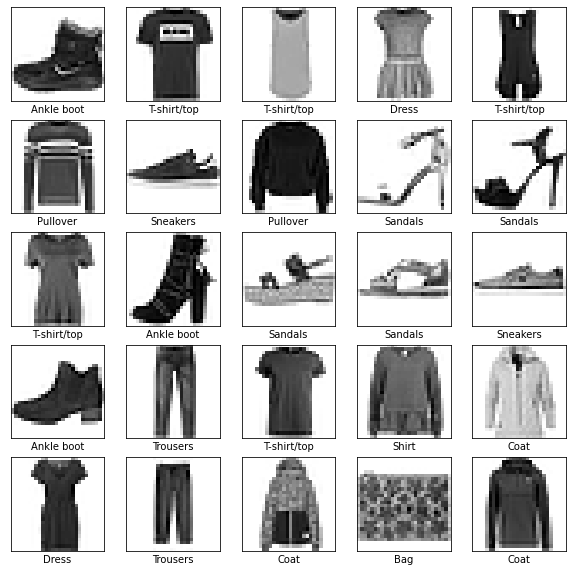

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
inputs = 128
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(inputs, activation= partial(tf.nn.leaky_relu, alpha=0.01)),
    tf.keras.layers.Dense(10)    
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1

In [9]:
model.fit(train_images, train_labels, epochs=50)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9108 - accuracy: 0.1038
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6340 - accuracy: 0.1053
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5604 - accuracy: 0.0899
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5297 - accuracy: 0.0942
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5063 - accuracy: 0.0996
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.0961
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.0896
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4742 - accuracy: 0.0877
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4632 - accuracy: 0.0877
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.464